In [15]:
import os

In [16]:
os.getcwd() #

'/Users/camilagioja/TP2'

In [17]:
os.chdir('/Users/camilagioja/TP2') # Ubicarnos en la carpeta del tp


In [18]:
!pip install pandas
import pandas as pd
!pip -q install pyreadstat
import numpy as np
import pyreadstat
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
indiv_2005 = pd.read_stata("Individual_t105 (2).dta",convert_categoricals=False)
indiv_2025 = pd.read_excel("usu_individual_T125 (3).xlsx")

hogar2025_archivos = pd.read_excel("usu_hogar_T125 (1).xlsx")
hogar_2005_archivos = pd.read_stata("Hogar_t105 (1).dta", convert_categoricals=False)
print(indiv_2025)

                              CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
0      TQRMNOVQVHJOLOCDEFKID00875778  2025          1          1           2   
1      TQRMNOVQVHJOLOCDEFKID00875778  2025          1          1           3   
2      TQRMNOVQVHJOLOCDEFKID00875778  2025          1          1           4   
3      TQRMNOVQVHJOLOCDEFKID00875778  2025          1          1           5   
4      TQRMNOUPQHLOLOCDEFKID00851757  2025          1          1           1   
...                              ...   ...        ...        ...         ...   
45420  TQRMNOPWQHLMKUCDEGJBF00852927  2025          1          1           4   
45421  TQRMNOPWQHLMKUCDEGJBF00852927  2025          1          1           5   
45422  TQRMNOSSVHLMLMCDEGJBF00852929  2025          1          1           1   
45423  TQRMNOSSXHLMLMCDEGJBF00858297  2025          1          2           1   
45424  TQRMNOSSXHLMLMCDEGJBF00858297  2025          1          2           2   

       H15  REGION MAS_500  AGLOMERADO 

In [20]:
indiv_2005.columns = [c.upper() for c in indiv_2005.columns]
#filtramos por la region 42 (cuyo)
def filtrar_region_42(df):
    if "REGION" in df.columns:
        region_col = "REGION"
    else:
        raise KeyError(f"El DataFrame no tiene la columna 'REGION' ni 'region'. Columnas disponibles: {list(df.columns)}")
    return df[pd.to_numeric(df[region_col], errors="coerce") == 42].copy()

#hogar_2005 = filtrar_region_42(hogar_2005)
indiv_2005 = filtrar_region_42(indiv_2005)
#hogar_2025 = filtrar_region_42(hogar_2025)
indiv_2025_archivos = filtrar_region_42(indiv_2025)


In [21]:
# Unimos hogar con individual para 2005
#data_2005 = pd.merge(indiv_2005,hogar_2005,on=["CODUSU", "NRO_HOGAR"],how="left",   # así no perdés personas aunque falte info de hogarsuffixes=("", "_HOG"),)

# Unimos hogar con individual para 2025
#data_2025 = pd.merge(indiv_2025,hogar_2025,on=["CODUSU", "NRO_HOGAR"],how="left",suffixes=("", "_HOG"),)
data_2005 = indiv_2005
data_2025 = indiv_2025
print(data_2005.shape)
print(data_2025.shape)

(4865, 176)
(45425, 235)


In [22]:
#Me quedo unicamente con las variables en común
comunes = sorted(set(data_2005.columns).intersection(set(data_2025.columns)))

data_2005 = data_2005[comunes].copy()
data_2025 = data_2025[comunes].copy()

print("Columnas 2005:", data_2005.shape[1])
print("Columnas 2025:", data_2025.shape[1])

Columnas 2005: 168
Columnas 2025: 168


In [23]:
# Queremos que nos queden las variables del mismo tipo para 2005 y 2025 (float, int, etc)
# Este codigo busca que variables tienen que ser float, string (codusu) y el resto int

# Identificar columnas de ingresos/montos (float)
ingresos = [c for c in data_2005.columns if any(x in c for x in [
    "ITF", "IPCF", "P47T", "P21", "T_VI", "TOT_P12",
    "_M",  # todas las variables monetarias
    "PP06", "PP08", "PP03", "PP04", "PP05"  # módulos de ocupación con ingresos
])]

import pandas as pd

# Pasar la lista a un DataFrame
df_ingresos = pd.DataFrame({"Variables_ingresos": ingresos})

# Mostrar
display(df_ingresos)




tipos_correctos = {}

for col in data_2005.columns:
    if col == "CODUSU":
        tipos_correctos[col] = "string"
    elif col in ingresos:
        tipos_correctos[col] = "float64"
    else:
        tipos_correctos[col] = "Int64"

# Aplicar a ambas bases
for col, tipo in tipos_correctos.items():
    if col == "CODUSU":
        # Pasar a string directo, sin coerción numérica
        data_2005[col] = data_2005[col].astype("string")
        data_2025[col] = data_2025[col].astype("string")
    else:
        data_2005[col] = pd.to_numeric(data_2005[col], errors="coerce").astype(tipo)
        data_2025[col] = pd.to_numeric(data_2025[col], errors="coerce").astype(tipo)

# Verificar
print("2005:\n", data_2005.dtypes.value_counts())
print("2025:\n", data_2025.dtypes.value_counts())


,Variables_ingresos
0,IPCF
1,ITF
2,P21
3,P47T
4,PP03C
5,PP03D
6,PP03G
7,PP03H
8,PP03I
9,PP03J


2005:
 Int64             114
float64            53
string[python]      1
Name: count, dtype: int64
2025:
 Int64             114
float64            53
string[python]      1
Name: count, dtype: int64


In [24]:
negativos_2005 = {}
negativos_2025 = {}

for col in data_2005.columns:
    if pd.api.types.is_numeric_dtype(data_2005[col]):
        vals = data_2005[col].dropna().unique()
        vals_neg = [v for v in vals if v < 0]
        if len(vals_neg) > 0:
            negativos_2005[col] = vals_neg

for col in data_2025.columns:
    if pd.api.types.is_numeric_dtype(data_2025[col]):
        vals = data_2025[col].dropna().unique()
        vals_neg = [v for v in vals if v < 0]
        if len(vals_neg) > 0:
            negativos_2025[col] = vals_neg

print("Variables con negativos en 2005:", negativos_2005)
print("Variables con negativos en 2025:", negativos_2025)


Variables con negativos en 2005: {'CH06': [np.int64(-1)], 'PP06C': [np.float64(-8.0), np.float64(-7.0)], 'PP06D': [np.float64(-8.0)]}
Variables con negativos en 2025: {'CH06': [np.int64(-1)], 'P21': [np.float64(-9.0)], 'P47T': [np.float64(-9.0)], 'PP06C': [np.float64(-9.0), np.float64(-8.0), np.float64(-7.0)], 'PP06D': [np.float64(-9.0), np.float64(-8.0), np.float64(-7.0)], 'PP08D1': [np.float64(-9.0)], 'PP08D4': [np.float64(-9.0)], 'PP08F1': [np.float64(-9.0)], 'PP08F2': [np.float64(-9.0)], 'PP08J1': [np.float64(-9.0)], 'PP08J2': [np.float64(-9.0)], 'PP08J3': [np.float64(-9.0)], 'TOT_P12': [np.float64(-9.0)], 'T_VI': [np.float64(-9.0)], 'V10_M': [np.float64(-9.0)], 'V12_M': [np.float64(-9.0)], 'V18_M': [np.float64(-9.0)], 'V3_M': [np.float64(-9.0)], 'V4_M': [np.float64(-9.0)], 'V8_M': [np.float64(-9.0)], 'V9_M': [np.float64(-9.0)]}


In [25]:
# Tomamos solo las columnas que son numéricas (int o float)
num_cols_2005 = data_2005.select_dtypes(include=["Int64","float64"]).columns
num_cols_2025 = data_2025.select_dtypes(include=["Int64","float64"]).columns

# Chequear valores negativos
negativos_2005 = (data_2005[num_cols_2005] < 0).sum()
negativos_2025 = (data_2025[num_cols_2025] < 0).sum()

print("Negativos en 2005:\n", negativos_2005[negativos_2005 > 0])
print("\nNegativos en 2025:\n", negativos_2025[negativos_2025 > 0])

#Estamos viendo cuales son las variables que tienen valores negativos para poder ver si son codigos de no respuesta

Negativos en 2005:
 CH06     83
PP06C    15
PP06D     5
dtype: Int64

Negativos en 2025:
 CH06        290
P21        3839
P47T       5405
PP06C      1105
PP06D       390
PP08D1     2381
PP08D4        1
PP08F1      107
PP08F2       71
PP08J1      501
PP08J2        7
PP08J3        5
TOT_P12     417
T_VI       1551
V10_M        85
V12_M       266
V18_M        10
V3_M         10
V4_M          9
V8_M        102
V9_M         12
dtype: Int64


In [26]:
#cambia los codigos de no respuesta por NaN (Ya verificamos que son codigos de no respuesta)

codigos_na = [-1, -7, -8, -9]

for col in data_2005.select_dtypes(include=["Int64","float64"]).columns:
    data_2005[col] = data_2005[col].replace(codigos_na, np.nan)

for col in data_2025.select_dtypes(include=["Int64","float64"]).columns:
    data_2025[col] = data_2025[col].replace(codigos_na, np.nan)


In [27]:
# Contar NaNs en cada variable
nans_2005 = data_2005.isna().sum().sort_values(ascending=False)
nans_2025 = data_2025.isna().sum().sort_values(ascending=False)

# Juntar en un DataFrame comparativo
resumen_nans = pd.DataFrame({
    "NaNs_2005": nans_2005,
    "NaNs_2025": nans_2025
})

# Configuración para mostrar todas las filas y columnas
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print(resumen_nans)

            NaNs_2005  NaNs_2025
ADECCFR             0          0
ADECIFR             0          0
ADECINDR            0          0
ADECOCUR         2949          0
AGLOMERADO          0          0
ANO4                0          0
CAT_INAC            0          0
CAT_OCUP            0          0
CH03                0          0
CH04                0          0
CH06               83        290
CH07                0          0
CH08                0          1
CH09                0          0
CH10                0          0
CH11                0          0
CH12                0          0
CH13                0          0
CH14             2337      23331
CH15                0          0
CH15_COD         4208      38772
CH16                0          0
CH16_COD         4736      44899
CODUSU              0          0
COMPONENTE          0          0
DECCFR              0          0
DECIFR              0          0
DECINDR             0          0
DECOCUR          2949          0
ESTADO    

In [28]:
# Contar ceros y NaNs en cada variable
reporte = pd.DataFrame({
    "Ceros_2005": (data_2005 == 0).sum(),
    "NaNs_2005": data_2005.isna().sum(),
    "Ceros_2025": (data_2025 == 0).sum(),
    "NaNs_2025": data_2025.isna().sum()
})

# Detectar casos sospechosos:
# - Muchos NaNs y casi ningún cero en un año
# - Muchos ceros y casi ningún NaN en el otro
sospechosos = reporte[
    ((reporte["NaNs_2005"] > 100) & (reporte["Ceros_2005"] < 5) & (reporte["Ceros_2025"] > 100) & (reporte["NaNs_2025"] < 5))
    |
    ((reporte["NaNs_2025"] > 100) & (reporte["Ceros_2025"] < 5) & (reporte["Ceros_2005"] > 100) & (reporte["NaNs_2005"] < 5))
]

print(sospechosos)


         Ceros_2005  NaNs_2005  Ceros_2025  NaNs_2025
INTENSI        2949          0           0      25349
PP03G          2949          0           0      25349
PP03I          2949          0           0      25349
PP03J          2949          0           0      25349
PP04A          2949          0           0      25349
PP04B1         2949          0           0      25349
PP10A          4698          0           1      44044
PP10C          4698          0           1      44044


In [29]:
# Para 2005
norespondieron05 = data_2005[(data_2005["ITF"].isna()) | (data_2005["ITF"] == 0)].copy()
respondieron05 = data_2005[(~data_2005["ITF"].isna()) & (data_2005["ITF"] != 0)].copy()

# Para 2025
norespondieron25 = data_2025[(data_2025["ITF"].isna()) | (data_2025["ITF"] == 0)].copy()
respondieron25 = data_2025[(~data_2025["ITF"].isna()) & (data_2025["ITF"] != 0)].copy()

# Chequeo rápido de tamaños
print("2005:", len(norespondieron05), "no respondieron |", len(respondieron05), "respondieron")
print("2025:", len(norespondieron25), "no respondieron |", len(respondieron25), "respondieron")


2005: 35 no respondieron | 4830 respondieron
2025: 12053 no respondieron | 33372 respondieron


In [30]:
# Leer base de equivalencias
tabla_equiv = pd.read_excel("tabla_adulto_equiv (1) (1).xlsx")

# Aseguramos nombres claros de columnas
tabla_equiv.columns = ["EDAD", "MUJERES", "VARONES"]

# Función para mapear edad + sexo a adulto_equiv
def asignar_adulto_equiv(row, tabla=tabla_equiv):
    edad = row["CH06"]
    sexo = row["CH04"]  # 1 = hombre, 2 = mujer

    if sexo == 1:  # hombre → usar columna VARONES
        valor = tabla.loc[tabla["EDAD"] == edad, "VARONES"]
    elif sexo == 2:  # mujer → usar columna MUJERES
        valor = tabla.loc[tabla["EDAD"] == edad, "MUJERES"]
    else:
        return None  # si CH04 no es 0 o 1

    # Si no encuentra edad en la tabla
    if valor.empty:
        return None
    return valor.values[0]

#Crear la nueva columna en base_2005
data_2025['adulto_equiv'] = data_2025.apply(asignar_adulto_equiv, axis=1)
data_2005['adulto_equiv'] = data_2005.apply(asignar_adulto_equiv, axis=1)

In [31]:
# Para 2005
data_2005["ad_equiv_hogar"] = (
    data_2005.groupby(["CODUSU", "NRO_HOGAR"])["adulto_equiv"].transform("sum")
)

# Para 2025
data_2025["ad_equiv_hogar"] = (
    data_2025.groupby(["CODUSU", "NRO_HOGAR"])["adulto_equiv"].transform("sum")
)

# Chequeo rápido
print(data_2005[["CODUSU", "NRO_HOGAR", "CH04", "CH06", "adulto_equiv", "ad_equiv_hogar"]].head(20))
print(data_2025[["CODUSU", "NRO_HOGAR", "CH04", "CH06", "adulto_equiv", "ad_equiv_hogar"]].head(20))


         CODUSU  NRO_HOGAR  CH04  CH06  adulto_equiv  ad_equiv_hogar
24285  125264            1     1    56          1.00            1.00
24286  125266            1     2    80          0.63            0.63
24287  125356            2     1    56          1.00            3.98
24288  125356            2     2    40          0.77            3.98
24289  125356            2     1    12          0.85            3.98
24290  125356            2     2    10          0.70            3.98
24291  125356            2     2     7          0.66            3.98
24292  125654            1     1    80          0.74            1.37
24293  125654            1     2    76          0.63            1.37
24294  126032            1     1    29          1.02            1.02
24295  126391            1     1    46          1.00            5.14
24296  126391            1     2    45          0.77            5.14
24297  126391            1     1    24          1.02            5.14
24298  126391            1     2  

In [32]:
#Filtrar respondieron y norespondieron
respondieron05 = data_2005[(data_2005["ITF"].notna()) & (data_2005["ITF"] != 0)].copy()
norespondieron05 = data_2005[(data_2005["ITF"].isna()) | (data_2005["ITF"] == 0)].copy()

respondieron25 = data_2025[(data_2025["ITF"].notna()) & (data_2025["ITF"] != 0)].copy()
norespondieron25 = data_2025[(data_2025["ITF"].isna()) | (data_2025["ITF"] == 0)].copy()

#Ingreso necesario (valores fijos por año)
respondieron05["ingreso_necesario"] = 205.07 * respondieron05["ad_equiv_hogar"]
respondieron25["ingreso_necesario"] = 365177 * respondieron25["ad_equiv_hogar"]

#Variable POBRE
respondieron05["POBRE"] = (respondieron05["ingreso_necesario"] > respondieron05["ITF"]).astype("Int64")
respondieron25["POBRE"] = (respondieron25["ingreso_necesario"] > respondieron25["ITF"]).astype("Int64")


#A los que no respondieron → NaN
norespondieron05["POBRE"] = pd.NA
norespondieron25["POBRE"] = pd.NA

respondieron05.head()

,ADECCFR,ADECIFR,ADECINDR,ADECOCUR,AGLOMERADO,ANO4,CAT_INAC,CAT_OCUP,CH03,CH04,CH06,CH07,CH08,CH09,CH10,CH11,CH12,CH13,CH14,CH15,CH15_COD,CH16,CH16_COD,CODUSU,COMPONENTE,DECCFR,DECIFR,DECINDR,DECOCUR,ESTADO,GDECCFR,GDECIFR,GDECINDR,GDECOCUR,H15,IDECCFR,IDECIFR,IDECINDR,IDECOCUR,INTENSI,IPCF,ITF,MAS_500,NIVEL_ED,NRO_HOGAR,P21,P47T,PDECCFR,PDECIFR,PDECINDR,PDECOCUR,PONDERA,PP02C1,PP02C2,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,PP02H,PP02I,PP03C,PP03D,PP03G,PP03H,PP03I,PP03J,PP04A,PP04B1,PP04B2,PP04B3_ANO,PP04B3_DIA,PP04B3_MES,PP04B_COD,PP04C,PP04C99,PP04D_COD,PP04G,PP05B2_ANO,PP05B2_DIA,PP05B2_MES,PP05C_1,PP05C_2,PP05C_3,PP05E,PP05F,PP05H,PP06A,PP06C,PP06D,PP06E,PP06H,PP07A,PP07C,PP07D,PP07E,PP07F1,PP07F2,PP07F3,PP07F4,PP07F5,PP07G1,PP07G2,PP07G3,PP07G4,PP07G_59,PP07H,PP07I,PP07J,PP07K,PP08D1,PP08D4,PP08F1,PP08F2,PP08J1,PP08J2,PP08J3,PP09A,PP09A_ESP,PP09B,PP09C,PP09C_ESP,PP10A,PP10C,PP10D,PP10E,PP11A,PP11B1,PP11B2_ANO,PP11B2_DIA,PP11B2_MES,PP11B_COD,PP11C,PP11C99,PP11D_COD,PP11G_ANO,PP11G_DIA,PP11G_MES,PP11L,PP11L1,PP11M,PP11N,PP11O,PP11P,PP11Q,PP11R,PP11S,PP11T,PP3E_TOT,PP3F_TOT,RDECCFR,RDECIFR,RDECINDR,RDECOCUR,REGION,TOT_P12,TRIMESTRE,T_VI,V10_M,V12_M,V18_M,V19_AM,V3_M,V4_M,V8_M,V9_M,adulto_equiv,ad_equiv_hogar,ingreso_necesario,POBRE
24285,10,9,10,10,10,2005,0,3,1,1,56,3,1,1,2,0,4,1,<NA>,3,6,1,<NA>,125264,1,10,9,10,10,1,10,9,10,10,1,10,9,10,10,4,2200.0,2200.0,<NA>,4,1,2200.0,2200.0,<NA>,<NA>,<NA>,<NA>,319,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,6003.0,11.0,0.0,11331.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,2,0,0,1,2,2,2,0,1,1,1,1,0,1,0,1,1,2200.0,200.0,0.0,0.0,0.0,0.0,0.0,0,<NA>,0,0,<NA>,0,0,0,0,0,0,0,0,0.0,<NA>,0,0,<NA>,0,0,0.0,0,0,0,0,0,0,0,0,0,0,60,0,10,9,10,10,42,0.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.00,1.00,205.0700,0
24286,5,1,3,<NA>,10,2005,1,0,1,2,80,4,1,1,2,0,2,2,4,2,<NA>,1,<NA>,125266,1,5,1,3,<NA>,3,4,1,3,<NA>,1,5,1,3,<NA>,0,290.0,290.0,<NA>,1,1,0.0,290.0,<NA>,<NA>,<NA>,<NA>,326,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,<NA>,0,0,<NA>,0,0,0,0,0,0,0,0,0.0,<NA>,0,0,<NA>,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,3,<NA>,42,0.0,1,290.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.63,0.63,129.1941,0
24287,6,8,7,6,10,2005,0,2,1,1,56,1,4,1,2,0,2,2,5,2,<NA>,1,<NA>,125356,1,5,8,7,5,1,5,8,7,5,1,6,8,7,6,3,320.0,1600.0,<NA>,1,2,550.0,750.0,<NA>,<NA>,<NA>,<NA>,327,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,5310.0,1.0,0.0,33114.0,2.0,0.0,0.0,0.0,3.0,2.0,3.0,1.0,7.0,2.0,2.0,550.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,<NA>,0,0,<NA>,0,0,0,0,0,0,0,0,0.0,<NA>,0,0,<NA>,0,0,0.0,0,0,0,0,0,0,0,0,0,0,36,4,6,8,7,6,42,200.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.00,3.98,816.1786,0
24288,6,8,8,8,10,2005,0,3,2,2,40,1,1,1,2,0,4,1,<NA>,1,<NA>,1,<NA>,125356,2,5,8,8,8,1,5,8,8,8,1,6,8,8,8,4,320.0,1600.0,<NA>,4,2,850.0,850.0,<NA>,<NA>,<NA>,<NA>,327,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1502.0,8.0,0.0,80323.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,2,0,0,2,2,2,2,5,1,1,1,1,0,1,0,1,1,850.0,150.0,0.0,0.0,0.0,0.0,0.0,0,<NA>,0,0,<NA>,0,0,0,0,0,0,0,0,0.0,<NA>,0,0,<NA>,0,0,0.0,0,0,0,0,0,0,0,0,0,0,60,0,6,8,8,8,42,0.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.77,3.98,816.1786,0
24289,6,8,0,<NA>,10,2005,3,0,3,1,12,5,1,1,1,1,9,2,5,1,<NA>,1,<NA>,125356,3,5,8,0,<NA>,3,5,8,0,<NA>,1,6,8,0,<NA>,0,320.0,1600.0,<NA>,1,2,0.0,0.0,<NA>,<NA>,<NA>,<NA>,327,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,<NA>,0,0,<NA>,0,0,0,0,0,0,0,0,0.0,<NA>,0,0,<NA>,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,6,8,0,<NA>,42,0.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.85,3.98,816.1786,0


In [33]:
#Crear columna POBRE en data_2005 y data_2025 con NaN por defecto
data_2005["POBRE"] = pd.NA
data_2025["POBRE"] = pd.NA

#Asignar valores desde respondieron
data_2005.loc[respondieron05.index, "POBRE"] = respondieron05["POBRE"]
data_2025.loc[respondieron25.index, "POBRE"] = respondieron25["POBRE"]

# Calculate ingreso_necesario for all rows in data_2005 and data_2025
data_2005["ingreso_necesario"] = 205.07 * data_2005["ad_equiv_hogar"]
data_2025["ingreso_necesario"] = 365177 * data_2025["ad_equiv_hogar"]


#Chequeo: distribución de la nueva variable
print("2005 - POBRE:")
print(data_2005["POBRE"].value_counts(dropna=False))

print("\n2025 - POBRE:")
print(data_2025["POBRE"].value_counts(dropna=False))

#Vista previa
print(data_2005[["CODUSU", "NRO_HOGAR", "ITF", "ingreso_necesario", "POBRE"]].head(10))
print(data_2025[["CODUSU", "NRO_HOGAR", "ITF", "ingreso_necesario", "POBRE"]].head(10))

2005 - POBRE:
POBRE
0       3155
1       1675
<NA>      35
Name: count, dtype: int64

2025 - POBRE:
POBRE
0       20905
1       12467
<NA>    12053
Name: count, dtype: int64
         CODUSU  NRO_HOGAR     ITF  ingreso_necesario POBRE
24285  125264            1  2200.0           205.0700     0
24286  125266            1   290.0           129.1941     0
24287  125356            2  1600.0           816.1786     0
24288  125356            2  1600.0           816.1786     0
24289  125356            2  1600.0           816.1786     0
24290  125356            2  1600.0           816.1786     0
24291  125356            2  1600.0           816.1786     0
24292  125654            1   440.0           280.9459     0
24293  125654            1   440.0           280.9459     0
24294  126032            1   800.0           209.1714     0
                          CODUSU  NRO_HOGAR        ITF  ingreso_necesario  \
0  TQRMNOVQVHJOLOCDEFKID00875778          1  1028000.0         1091879.23   
1  TQRMNOVQV

In [34]:
def resumen_pobre(df, col="POBRE"):
    n_total = len(df)
    n_pobres = (df[col] == 1).sum()
    n_no_pobres = (df[col] == 0).sum()
    n_nans = df[col].isna().sum()

    return pd.Series({
        "Observaciones totales": n_total,
        "Pobres (1)": n_pobres,
        "No pobres (0)": n_no_pobres,
        "NaN (sin respuesta)": n_nans,
        "% Pobres (sobre válidos)": round(n_pobres / (n_pobres + n_no_pobres) * 100, 2) if (n_pobres + n_no_pobres) > 0 else pd.NA,
        "% No pobres (sobre válidos)": round(n_no_pobres / (n_pobres + n_no_pobres) * 100, 2) if (n_pobres + n_no_pobres) > 0 else pd.NA,
        "% NaN (sobre total)": round(n_nans / n_total * 100, 2) if n_total > 0 else pd.NA
    })

#Crear tablas comparativas
tabla_2005 = resumen_pobre(data_2005)
tabla_2025 = resumen_pobre(data_2025)

tabla_pobre = pd.DataFrame([tabla_2005, tabla_2025], index=["2005", "2025"])
display(tabla_pobre)


,Observaciones totales,Pobres (1),No pobres (0),NaN (sin respuesta),% Pobres (sobre válidos),% No pobres (sobre válidos),% NaN (sobre total)
2005,4865.0,1675.0,3155.0,35.0,34.68,65.32,0.72
2025,45425.0,12467.0,20905.0,12053.0,37.36,62.64,26.53


In [35]:
#Aca ya nos quedó la variable Pobre incluida en data_2005 y data_2025 con NaNs para los casos donde no se haya informado ITF

#Ya estamos para concatenar todo en un nuevo df data_final

# Agregar columna ANIO
data_2005["ANIO"] = 2005
data_2025["ANIO"] = 2025

# Concatenar
data_final = pd.concat([data_2005, data_2025], ignore_index=True)

# Chequeo rápido
#print(data_final["ANIO"].value_counts())
print(data_final.head())
data_final.sample(30, random_state=42)

   ADECCFR  ADECIFR  ADECINDR  ADECOCUR  AGLOMERADO  ANO4  CAT_INAC  CAT_OCUP  \
0       10        9        10        10          10  2005         0         3   
1        5        1         3      <NA>          10  2005         1         0   
2        6        8         7         6          10  2005         0         2   
3        6        8         8         8          10  2005         0         3   
4        6        8         0      <NA>          10  2005         3         0   

   CH03  CH04  CH06  CH07  CH08  CH09  CH10  CH11  CH12  CH13  CH14  CH15  \
0     1     1    56     3     1     1     2     0     4     1  <NA>     3   
1     1     2    80     4     1     1     2     0     2     2     4     2   
2     1     1    56     1     4     1     2     0     2     2     5     2   
3     2     2    40     1     1     1     2     0     4     1  <NA>     1   
4     3     1    12     5     1     1     1     1     9     2     5     1   

   CH15_COD  CH16  CH16_COD    CODUSU  COMPONENTE 

,ADECCFR,ADECIFR,ADECINDR,ADECOCUR,AGLOMERADO,ANO4,CAT_INAC,CAT_OCUP,CH03,CH04,CH06,CH07,CH08,CH09,CH10,CH11,CH12,CH13,CH14,CH15,CH15_COD,CH16,CH16_COD,CODUSU,COMPONENTE,DECCFR,DECIFR,DECINDR,DECOCUR,ESTADO,GDECCFR,GDECIFR,GDECINDR,GDECOCUR,H15,IDECCFR,IDECIFR,IDECINDR,IDECOCUR,INTENSI,IPCF,ITF,MAS_500,NIVEL_ED,NRO_HOGAR,P21,P47T,PDECCFR,PDECIFR,PDECINDR,PDECOCUR,PONDERA,PP02C1,PP02C2,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,PP02H,PP02I,PP03C,PP03D,PP03G,PP03H,PP03I,PP03J,PP04A,PP04B1,PP04B2,PP04B3_ANO,PP04B3_DIA,PP04B3_MES,PP04B_COD,PP04C,PP04C99,PP04D_COD,PP04G,PP05B2_ANO,PP05B2_DIA,PP05B2_MES,PP05C_1,PP05C_2,PP05C_3,PP05E,PP05F,PP05H,PP06A,PP06C,PP06D,PP06E,PP06H,PP07A,PP07C,PP07D,PP07E,PP07F1,PP07F2,PP07F3,PP07F4,PP07F5,PP07G1,PP07G2,PP07G3,PP07G4,PP07G_59,PP07H,PP07I,PP07J,PP07K,PP08D1,PP08D4,PP08F1,PP08F2,PP08J1,PP08J2,PP08J3,PP09A,PP09A_ESP,PP09B,PP09C,PP09C_ESP,PP10A,PP10C,PP10D,PP10E,PP11A,PP11B1,PP11B2_ANO,PP11B2_DIA,PP11B2_MES,PP11B_COD,PP11C,PP11C99,PP11D_COD,PP11G_ANO,PP11G_DIA,PP11G_MES,PP11L,PP11L1,PP11M,PP11N,PP11O,PP11P,PP11Q,PP11R,PP11S,PP11T,PP3E_TOT,PP3F_TOT,RDECCFR,RDECIFR,RDECINDR,RDECOCUR,REGION,TOT_P12,TRIMESTRE,T_VI,V10_M,V12_M,V18_M,V19_AM,V3_M,V4_M,V8_M,V9_M,adulto_equiv,ad_equiv_hogar,POBRE,ingreso_necesario,ANIO
34993,12,12,5,0,14,2025,1,0,2,2,85,2,1,1,2,0,2,1,<NA>,1,<NA>,1,<NA>,TQRMNOPPTHKMKRCDEGKDB00857243,2,12,12,4,0,3,<NA>,<NA>,<NA>,<NA>,1,12,12,4,0,<NA>,0.00,0.0,<NA>,2,1,0.0,445000.0,12,12,4,0,91,0,0,0,0,0,0,0,0,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,12,12,4,0,43,0.0,1,445000.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.63,1.37,<NA>,5.002925e+05,2025
725,3,2,2,2,10,2005,0,2,3,1,16,5,4,1,2,0,3,2,9,1,<NA>,1,<NA>,184377,2,3,2,2,2,1,2,2,2,2,1,3,2,2,2,4,165.00,330.0,<NA>,3,1,180.0,180.0,<NA>,<NA>,<NA>,<NA>,338,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,2.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,5306.0,1.0,0.0,33114.0,9.0,0.0,0.0,0.0,3.0,3.0,3.0,2.0,7.0,4.0,2.0,180.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,<NA>,0,0,<NA>,0,0,0,0,0,0,0,0,0.0,<NA>,0,0,<NA>,0,0,0.0,0,0,0,0,0,0,0,0,0,0,60,0,3,2,2,2,42,0.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.03,1.79,1,3.670753e+02,2005
26501,8,6,0,0,9,2025,4,0,2,2,51,2,1,1,2,0,4,1,<NA>,1,<NA>,1,<NA>,TQRMNORUPHKOLPCDEFPCH00860204,2,8,8,0,0,3,<NA>,<NA>,<NA>,<NA>,1,9,8,0,0,<NA>,900000.00,1800000.0,<NA>,4,1,0.0,0.0,9,8,0,0,205,0,0,0,0,0,0,0,0,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7,6,0,0,44,0.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.76,1.76,0,6.427115e+05,2025
10798,6,10,3,3,18,2025,0,1,1,1,51,2,1,1,2,0,4,1,<NA>,1,<NA>,1,<NA>,TQRMNOPRXHMOKOCDEGOIH00878342,1,5,9,2,3,1,<NA>,<NA>,<NA>,<NA>,1,5,9,2,3,3,416666.67,2500000.0,<NA>,4,1,300000.0,300000.0,5,9,2,3,266,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,9200.0,3.0,0.0,5002.0,11.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,7.0,6.0,1.0,0.0,300000.0,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,<NA>,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,52,0,6,9,3,4,40,0.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.00,5.00,0,1.825885e+06,2025
3425,6,10,0,<NA>,27,2005,5,0,5,2,<NA>,5,1,3,0,0,0,0,<NA>,1,<NA>,6,<NA>,136352,8,5,9,0,<NA>,4,<NA>,<NA>,<NA>,<NA>,0,5,9,0,<NA>,0,2

In [36]:
#PARTE I

In [37]:
#ejercicio 1

In [38]:
data_2005=data_2005.rename(columns={"CH06": "EDAD"})
data_2025=data_2025.rename(columns={"CH06": "EDAD"})

data_2005["EDAD2"] = data_2005["EDAD"] ** 2
data_2025["EDAD2"] = data_2025["EDAD"] ** 2

In [39]:
data_final = data_final.rename(columns={"CH06": "EDAD"})

#Edad al cuadrado
data_final["EDAD2"] = data_final["EDAD"] ** 2

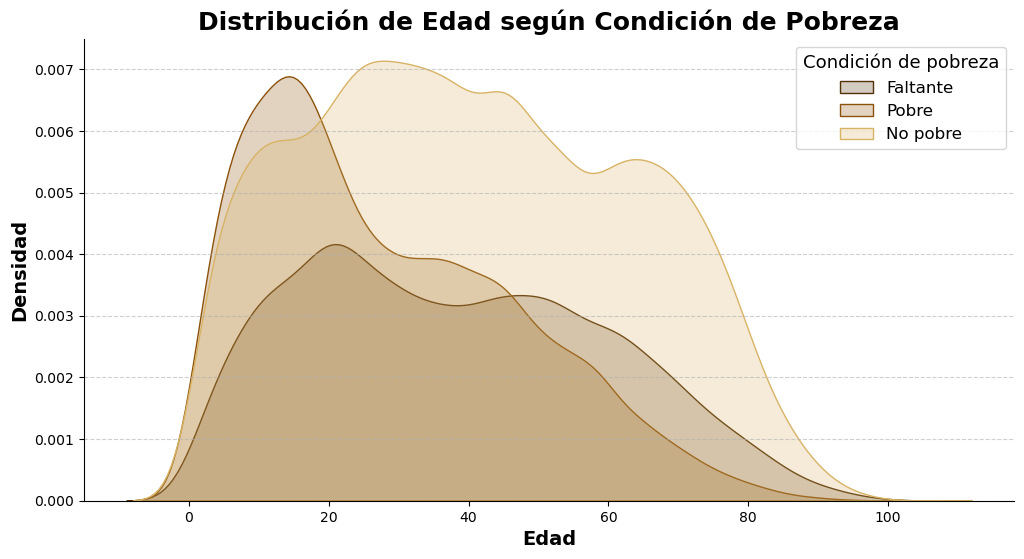

In [40]:
# Paleta marrones consistente
palette = {
    "Pobre": "#8c510a",       # marrón
    "No pobre": "#d8b365",    # beige cálido
    "Faltante": "#543005",    # marrón oscuro
}

# Copia temporal sin edades faltantes ni negativas
df_plot = data_final[data_final["EDAD"].notna()].copy()
df_plot = df_plot[df_plot["EDAD"] >= 0]

# Mapear POBRE → etiquetas
df_plot["POBRE_plot"] = df_plot["POBRE"].map({1: "Pobre", 0: "No pobre"})
df_plot["POBRE_plot"] = df_plot["POBRE_plot"].fillna("Faltante")

# Graficar
plt.figure(figsize=(12,6))
sns.kdeplot(
    data=df_plot,
    x="EDAD",
    hue="POBRE_plot",
    fill = True,
    palette=palette,
)

# Estética: títulos y etiquetas
plt.title("Distribución de Edad según Condición de Pobreza", fontsize=18, weight="bold")
plt.xlabel("Edad", fontsize=14, weight="bold")
plt.ylabel("Densidad", fontsize=14, weight="bold")

# Leyenda clara
plt.legend(
    title="Condición de pobreza",
    title_fontsize=13,
    fontsize=12,
    labels=["Faltante", "Pobre", "No pobre"],
)

plt.grid(axis="y", linestyle="--", alpha=0.6)
sns.despine()
#plt.tight_layout()
#plt.show()


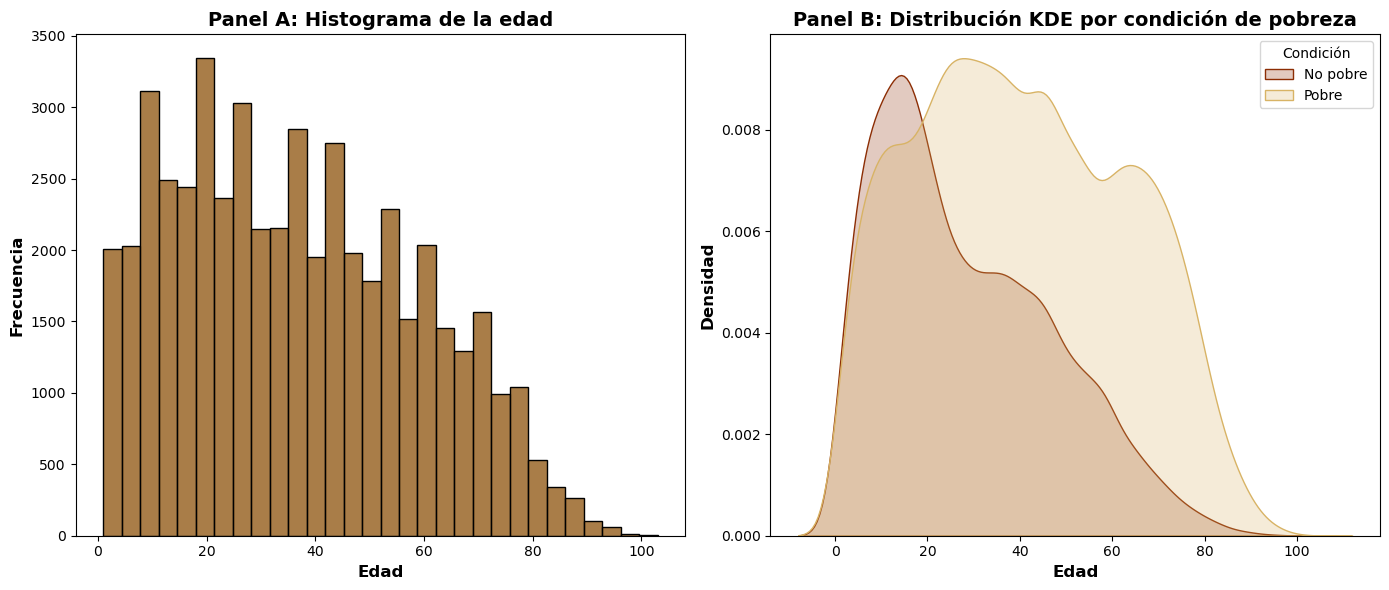

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Panel A: Histograma de edad
sns.histplot(data=data_final, x="EDAD", bins=30, color="#8c510a", ax=axes[0])
axes[0].set_title("Panel A: Histograma de la edad", fontsize=14, weight="bold")
axes[0].set_xlabel("Edad", fontsize=12, weight="bold")
axes[0].set_ylabel("Frecuencia", fontsize=12, weight="bold")

# Panel B: Distribución kernel pobres vs no pobres
df_kde = data_final[data_final["POBRE"].notna()].copy()
sns.kdeplot(data=df_kde, x="EDAD", hue="POBRE",
            palette={1: "#8c2d04", 0: "#d8b365"},
            fill=True, ax=axes[1])

# Ajustes
axes[1].set_title("Panel B: Distribución KDE por condición de pobreza", fontsize=14, weight="bold")
axes[1].set_xlabel("Edad", fontsize=12, weight="bold")
axes[1].set_ylabel("Densidad", fontsize=12, weight="bold")
axes[1].legend(title="Condición", labels=["No pobre", "Pobre"])

plt.tight_layout()
plt.show()


In [42]:
#ejercicio 2

In [43]:
for df in (data_2005, data_2025):
    for col in ["CH12","CH13","CH14"]:
        df[col] = pd.to_numeric(df.get(col), errors="coerce")

    # CH14: 98 y 99 no son años válidos → NaN
    df.loc[df["CH14"].isin([98, 99]), "CH14"] = np.nan

In [44]:
def calcular_educ(row):
    nivel = row["CH12"]   #nivel alcanzado
    fin   = row["CH13"]   #1=finalizó, 2=no
    ult   = row["CH14"]   #último año aprobado (dentro del nivel)

    educ = np.nan

    #si falta nivel, no podemos calcular
    if pd.isna(nivel):
        return educ

    #Primaria
    if nivel in [1, 2]:            #1=incompleta, 2= completa
        if nivel == 2 or fin == 1: #completa
            educ = 6
        else:                      #incompleta
            educ = ult

    #Secundaria
    elif nivel in [3, 4]:          #3=incompleta, 4= completa
        if nivel == 4 or fin == 1:
            educ = 12
        else:
            educ = 6 + (ult if pd.notna(ult) else 0)

    #Terciario/superior no Univ
    elif nivel in [5, 6]:          # 5=incompleto, 6= completo
        if nivel == 6 or fin == 1:
            educ = 15
        else:
            educ = 12 + (ult if pd.notna(ult) else 0)

    #Universitario
    elif nivel in [7, 8]:          # 7=incompleto, 8= completo
        if nivel == 8 or fin == 1:
            educ = 17
        else:
            educ = 12 + (ult if pd.notna(ult) else 0)

    #Posgrado
    elif nivel == 9:
        # si no sabemos "ult", ponemos 19 por defecto; si sabemos, 17 + ult
        educ = 17 + (ult if pd.notna(ult) else 2)

    # Asegurar rango razonable
    if pd.notna(educ):
        if educ < 0:  educ = 0
        if educ > 21: educ = 21

    return educ


In [45]:
for df in (data_2005, data_2025):
    df["EDUC"] = df.apply(calcular_educ, axis=1)

base = pd.concat([data_2005[["ANIO","EDUC","CODUSU", "POBRE"]],
                  data_2025[["ANIO","EDUC","CODUSU", "POBRE"]]], ignore_index=True)

#forzar numérico por las dudas
base["EDUC"] = pd.to_numeric(base["EDUC"], errors="coerce")

In [46]:
# Total
desc_total = base["EDUC"].describe(percentiles=[0.5]).rename({
    "mean":"media","std":"sd","min":"mínimo","50%":"p50","max":"máximo"
})
print(desc_total)

#Por año (2005 vs 2025)
desc_por_anio = base.groupby("ANIO")["EDUC"].describe()[["mean","std","min","50%","max","count"]].rename(columns={
    "mean":"media","std":"sd","min":"mínimo","50%":"p50","max":"máximo"
})
print(desc_por_anio)

count     48396.000000
media        11.178816
sd            3.942081
mínimo        0.000000
p50          12.000000
máximo       21.000000
Name: EDUC, dtype: float64
          media        sd  mínimo   p50  máximo    count
ANIO                                                    
2005  10.677045  3.882922     0.0  12.0    21.0   4400.0
2025  11.228998  3.944483     0.0  12.0    21.0  43996.0


In [47]:
#ejercicio 3

In [48]:
#esto es para sacar cuanto subieron los precio del 2005 al 2025
#parámetros (con los del TP1)
LINEA_2005 = 205.07
LINEA_2025 = 365_177.0
DEF_2005_A_2025 = LINEA_2025 / LINEA_2005  #deflactor "canasta-equivalente" --> divido la linea de pobreza del 20205 con la de 2005 para ver cuántas veces subió la canasta de pobreza entre 2005 y 2025.

#asegurar tipos
for df in (data_2005, data_2025):
    df["ITF"] = pd.to_numeric(df.get("ITF", np.nan), errors="coerce")
    # Si tenés AD_EQUIV_HOGAR del TP1, usalo acá:
    # df["EQ_HOGAR"] = pd.to_numeric(df["AD_EQUIV_HOGAR"], errors="coerce")
    # Si no, mantenemos el proxy que ya construiste en el inciso 1:
    df["EQ_HOGAR"] = df["ad_equiv_hogar"] # Assign ad_equiv_hogar to EQ_HOGAR

# ITF en pesos de 2025
data_2005["ITF_2025"] = data_2005["ITF"] * DEF_2005_A_2025
data_2025["ITF_2025"] = data_2025["ITF"]  # ya está en 2025

# Línea de pobreza del hogar en $ 2025 (para la línea vertical)
data_2005["PL_2025"] = LINEA_2025 * data_2005["EQ_HOGAR"]
data_2025["PL_2025"] = LINEA_2025 * data_2025["EQ_HOGAR"]

# Base unificada mínima para graficar
cols = ["ANIO","ITF_2025","POBRE","PL_2025", "EDAD", "EDAD2"]
base_inc3 = pd.concat([data_2005[cols], data_2025[cols]], ignore_index=True)

# Por prolijidad: quitar ITF_2025 <= 0 o NaN (no suman al kernel/hist)
base_inc3 = base_inc3.loc[(base_inc3["ITF_2025"] > 0) & base_inc3["ITF_2025"].notna()].copy()

# Mediana de la línea de pobreza (en $ 2025) para dibujar la línea vertical
pl_mediana = float(base_inc3["PL_2025"].median())
print(DEF_2005_A_2025)

1780.7431608718975


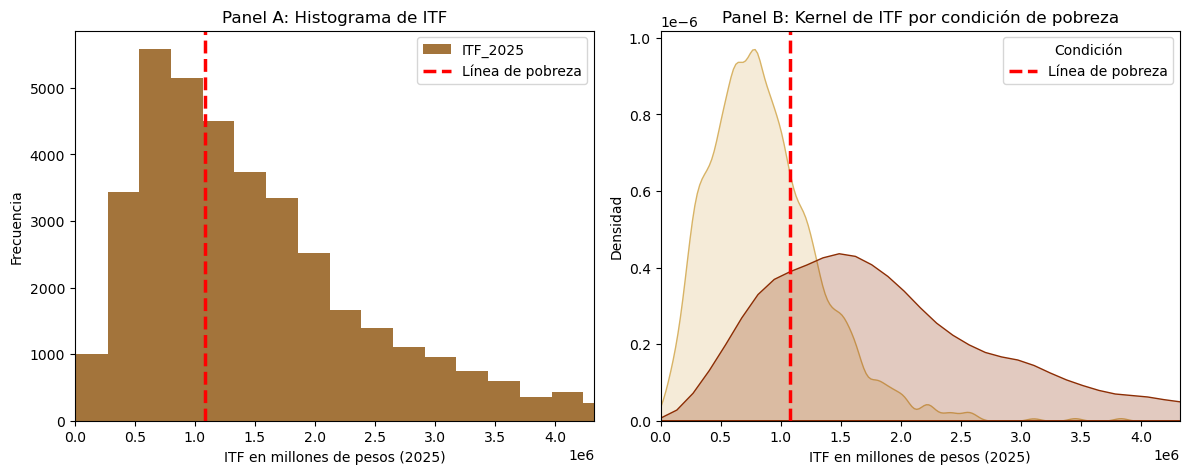

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

## --- Panel A: Histograma ---
ax = axes[0]
base_inc3["ITF_2025"].plot(
    kind="hist",
    bins=100,
    color="#8c510a",
    alpha=0.8,
    ax=ax
)
ax.axvline(float(pl_mediana), color="red", linestyle="--", linewidth=2.5, label="Línea de pobreza")
ax.set_xlim(0, float(pl_mediana) * 4)
ax.set_title("Panel A: Histograma de ITF")
ax.set_xlabel("ITF en millones de pesos (2025)")
ax.set_ylabel("Frecuencia")
ax.legend()

## --- Panel B: Kernel ---
ax = axes[1]
#ax.ticklabel_format(style='plain', axis='y')
sns.kdeplot(
    data=base_inc3, x="ITF_2025", hue="POBRE",
    common_norm=False, bw_adjust=0.8, clip=(0, None),
    palette={0: "#8c2d04", 1: "#d8b365"}, fill=True, ax=ax
)
ax.axvline(float(pl_mediana), color="red", linestyle="--", linewidth=2.5, label="Línea de pobreza")
ax.set_xlim(0, float(pl_mediana) * 4)
ax.set_title("Panel B: Kernel de ITF por condición de pobreza")
ax.set_xlabel("ITF en millones de pesos (2025)")
ax.set_ylabel("Densidad")
ax.legend(title="Condición")

plt.tight_layout()
plt.show()


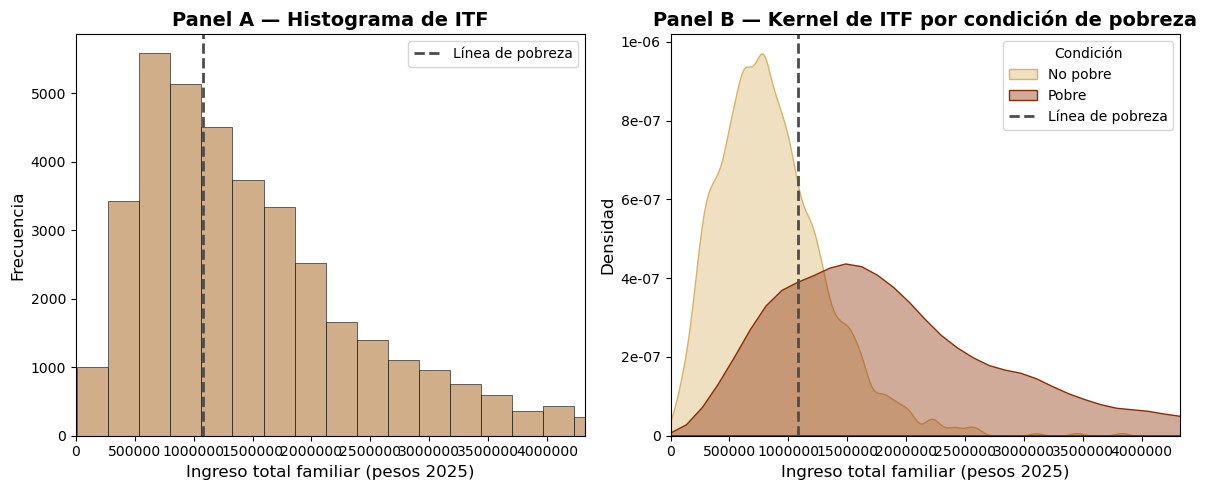

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

fig, axes = plt.subplots(1, 2, figsize=(12,5))

## --- Panel A: Histograma ---
ax = axes[0]
base_inc3["ITF_2025"].plot(
    kind="hist",
    bins=100,                          # menos bins → más legible
    color="#c49a6c",                   # marrón suave
    edgecolor="black", linewidth=0.5,  # bordes de las barras
    alpha=0.8,
    ax=ax
)

# Línea de pobreza (gris oscuro)
ax.axvline(float(pl_mediana), color="#4c4c4c", linestyle="--",
           linewidth=2, label="Línea de pobreza")

ax.set_xlim(0, float(pl_mediana) * 4)
ax.set_title("Panel A — Histograma de ITF", fontsize=14, fontweight = "bold")
ax.set_xlabel("Ingreso total familiar (pesos 2025)", fontsize = 12)
ax.set_ylabel("Frecuencia", fontsize = 12)

# Quitar leyenda de 'ITF_2025', dejar solo línea
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[-1]], [labels[-1]])

# Evitar notación científica
ax.ticklabel_format(style='plain', axis='x')

## --- Panel B: Kernel ---
ax = axes[1]
sns.kdeplot(
    data=base_inc3, x="ITF_2025", hue="POBRE",
    common_norm=False, bw_adjust=0.8, clip=(0, None),
    palette={0: "#8c2d04", 1: "#d8b365"},
    fill=True, alpha=0.4, ax=ax
)

ax.axvline(float(pl_mediana), color="#4c4c4c", linestyle="--",
           linewidth=2, label="Línea de pobreza")

ax.set_xlim(0, float(pl_mediana) * 4)
ax.set_title("Panel B — Kernel de ITF por condición de pobreza", fontsize=14, fontweight = "bold")
ax.set_xlabel("Ingreso total familiar (pesos 2025)", fontsize = 12)
ax.set_ylabel("Densidad", fontsize = 12)

# Mejorar leyenda
ax.legend(title="Condición", labels=["No pobre","Pobre","Línea de pobreza"], loc="upper right")

# Evitar notación científica
ax.ticklabel_format(style='plain', axis='x')
#ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2g'))

plt.tight_layout()
plt.show()

In [51]:
#ejercicio 4

In [52]:
#me aseguro que sean numéricas
for df in (data_2005, data_2025):
    df["PP3E_TOT"] = pd.to_numeric(df.get("PP3E_TOT"), errors="coerce")
    df["PP3F_TOT"] = pd.to_numeric(df.get("PP3F_TOT"), errors="coerce")

    #creo horastrab como suma de ambas
    df["horastrab"] = df["PP3E_TOT"].fillna(0) + df["PP3F_TOT"].fillna(0)

#base con año + horas
horas = pd.concat([data_2005[["ANIO","horastrab"]],
                   data_2025[["ANIO","horastrab"]]], ignore_index=True)


In [53]:
#para hacer los descriptivos por años
desc_horas = horas.groupby("ANIO")["horastrab"].describe().rename(columns={
    "mean":"media","std":"sd","min":"mínimo","50%":"mediana","max":"máximo"
})[["count","media","sd","mínimo","mediana","máximo"]]

print(desc_horas)

        count      media         sd  mínimo  mediana  máximo
ANIO                                                        
2005   4865.0  14.776156  23.435615     0.0      0.0   126.0
2025  45425.0  16.314827  36.851559     0.0      0.0  1998.0


In [54]:
#ejercicio 5

In [55]:
# 1) Cantidad de observaciones (individuos)
obs = base.groupby("ANIO").size()
print("Cantidad observaciones (individuos) por año:\n", obs)

# 2) NAs en POBRE
nas = base.groupby("ANIO")["POBRE"].apply(lambda x: x.isna().sum())
print("\nObs con NA en POBRE por año:\n", nas)

# 3) Pobres
pobres = base.groupby("ANIO")["POBRE"].sum(min_count=1)  # suma True=1
print("\nCantidad de Pobres por año:\n", pobres)

# 4) No pobres
no_pobres = base.groupby("ANIO")["POBRE"].apply(lambda x: (x==0).sum())
print("\nCantidad de No Pobres por año:\n", no_pobres)

# 5) Cantidad de variables limpias
# Assuming "limpias" refers to the columns included in the base dataframe
vars_limpias = base.shape[1]
print("\nCantidad de variables limpias:", vars_limpias)

# 6) Armar tabla
tabla1 = pd.DataFrame({
    "Cantidad observaciones": obs,
    "Obs con NA en POBRE": nas,
    "Cantidad de Pobres": pobres,
    "Cantidad de No Pobres": no_pobres
})
tabla1.loc["Total"] = tabla1.sum(numeric_only=True)
tabla1["Variables limpias"] = vars_limpias

print("\nTabla Resumen:")
print(tabla1)

Cantidad observaciones (individuos) por año:
 ANIO
2005     4865
2025    45425
dtype: int64

Obs con NA en POBRE por año:
 ANIO
2005       35
2025    12053
Name: POBRE, dtype: int64

Cantidad de Pobres por año:
 ANIO
2005     1675
2025    12467
Name: POBRE, dtype: object

Cantidad de No Pobres por año:
 ANIO
2005     3155
2025    20905
Name: POBRE, dtype: int64

Cantidad de variables limpias: 4

Tabla Resumen:
       Cantidad observaciones  Obs con NA en POBRE Cantidad de Pobres  \
ANIO                                                                    
2005                   4865.0                 35.0               1675   
2025                  45425.0              12053.0              12467   
Total                 50290.0              12088.0                NaN   

       Cantidad de No Pobres  Variables limpias  
ANIO                                             
2005                  3155.0                  4  
2025                 20905.0                  4  
Total               

In [56]:
#esto no me convence
# Número de columnas en la base final
print("Número de columnas (variables) en base final:", base.shape[1])

# Nombres de las columnas
print("\nNombres de las variables en la base final:")
for col in base.columns:
    print("-", col)

Número de columnas (variables) en base final: 4

Nombres de las variables en la base final:
- ANIO
- EDUC
- CODUSU
- POBRE


In [57]:
# PARTE II

In [58]:
hogar_2025 = hogar2025_archivos
hogar_2005 = hogar_2005_archivos

In [59]:
hogar_2005.columns = [c.upper() for c in hogar_2005.columns]
hogar_2025.columns = [c.upper() for c in hogar_2025.columns]

#para quedarme con CODOSU y IX_TOT
hogar_2005 = hogar_2005[["CODUSU", "IX_TOT"]].copy()
hogar_2025 = hogar_2025[["CODUSU", "IX_TOT"]].copy()

#Unir individuos con hogares
data_2005 = data_2005.merge(hogar_2005, on="CODUSU", how="left")
data_2025 = data_2025.merge(hogar_2025, on="CODUSU", how="left")

#ITF en pesos de 2025
data_2005["ITF_2025"] = data_2005["ITF"] * DEF_2005_A_2025
data_2025["ITF_2025"] = data_2025["ITF"]  # ya está en 2025

In [60]:
#EJERCICIO 1

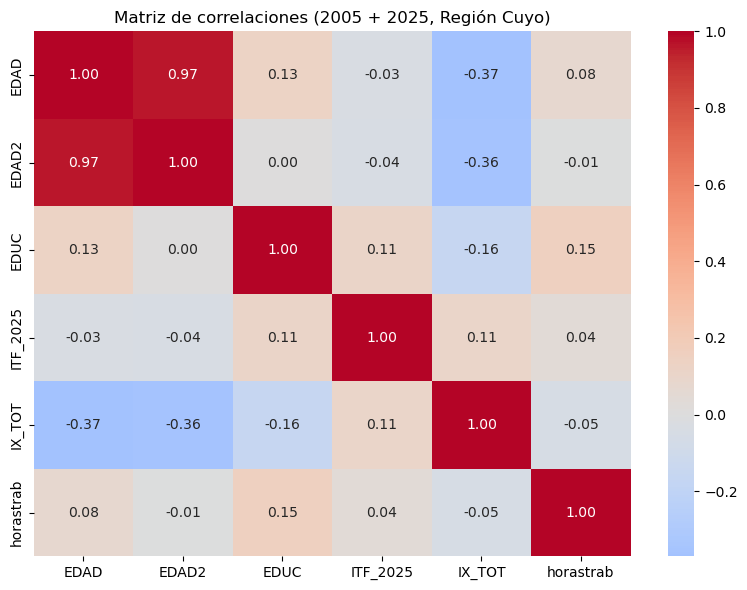

In [61]:
#mapa de correlacion
#renombrar CH06 a EDAD y crear EDAD2
for df in (data_2005, data_2025):
    if "CH06" in df.columns:
        df.rename(columns={"CH06": "EDAD"}, inplace=True)
    df["EDAD2"] = df["EDAD"] ** 2

#variables de interés
vars_inc2 = ["EDAD","EDAD2","EDUC","ITF_2025","IX_TOT","horastrab"] #uso ITF_2025 porque ya esta homogenizada en pesos de 2025

#unir 2005 y 2025 en una sola base
base_part2 = pd.concat(
    [data_2005[vars_inc2 + ["ANIO"]],
     data_2025[vars_inc2 + ["ANIO"]]],
    ignore_index=True
).copy()

# Drop NA values before calculating correlations
base_part2_clean = base_part2[vars_inc2].dropna()

#matriz de correlaciones
corr = base_part2_clean.corr()

#mostrar como heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlaciones (2005 + 2025, Región Cuyo)")
plt.tight_layout()
plt.show()


In [62]:
# EJERCICIO 2

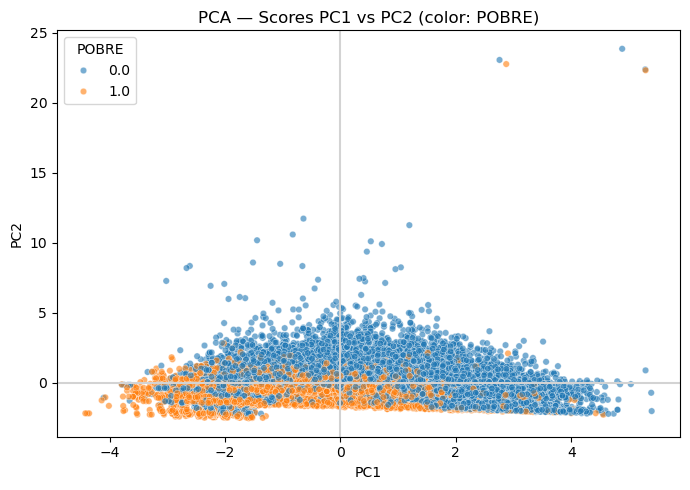

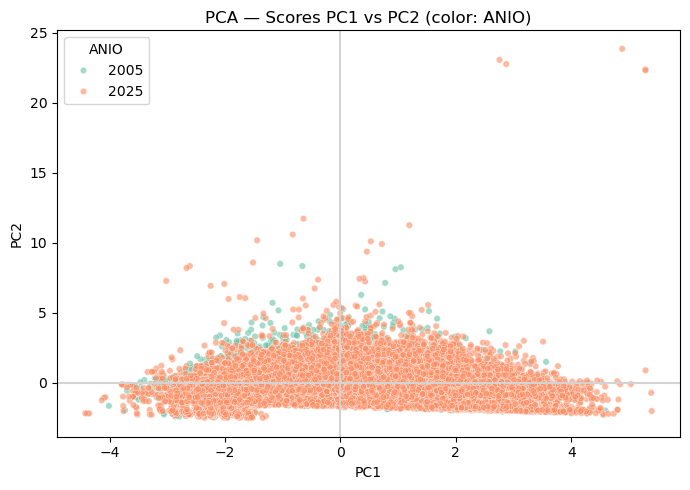

Varianza explicada por componente: [0.371 0.223 0.164 0.134 0.104 0.003]
Varianza explicada acumulada: [0.371 0.594 0.758 0.892 0.997 1.   ]

Loadings:
              PC1    PC2    PC3    PC4    PC5    PC6
EDAD       0.642 -0.016  0.212  0.074  0.200  0.705
EDAD2      0.629 -0.135  0.274  0.059  0.131 -0.701
EDUC       0.122  0.614 -0.279 -0.566  0.451 -0.082
ITF_2025  -0.054  0.530  0.677 -0.157 -0.482  0.011
IX_TOT    -0.408  0.010  0.521  0.235  0.711 -0.012
horastrab  0.093  0.569 -0.268  0.769 -0.014 -0.068


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#armo base con variables
vars_inc2 = ["EDAD","EDAD2","EDUC","ITF_2025","IX_TOT","horastrab"]

base_part2 = pd.concat(
    [data_2005[vars_inc2 + ["ANIO","POBRE"]],
     data_2025[vars_inc2 + ["ANIO","POBRE"]]],
    ignore_index=True
).copy()

#NaNs in the 6 variables and POBRE column
df_pca = base_part2.dropna(subset=vars_inc2 + ["POBRE"]).copy()

#estandarización
scaler = StandardScaler()
X = scaler.fit_transform(df_pca[vars_inc2])

#ajusto PCA
pca = PCA(n_components=len(vars_inc2), random_state=42)
Z = pca.fit_transform(X)         # scores (observaciones en el espacio PC)
load = pca.components_.T         # loadings (pesos de cada variable en cada PC)
exp_var = pca.explained_variance_ratio_
exp_var_cum = np.cumsum(exp_var)

#dataFrames ordenados para usar
scores = pd.DataFrame(Z, columns=[f"PC{i+1}" for i in range(Z.shape[1])])
scores["ANIO"]  = df_pca["ANIO"].to_numpy()
scores["POBRE"] = df_pca["POBRE"].astype(float).to_numpy() # Ensure POBRE is numeric

loadings = pd.DataFrame(load, index=vars_inc2, columns=[f"PC{i+1}" for i in range(load.shape[1])])

#esto que sigue es opcione, no lo pide la consigna pero para que quede mas lindo

#grafico: scores PC1 vs PC2 coloreado por POBRE
plt.figure(figsize=(7,5))
sns.scatterplot(data=scores, x="PC1", y="PC2", hue="POBRE", alpha=0.6, s=22)
plt.axhline(0, color="lightgray"); plt.axvline(0, color="lightgray")
plt.title("PCA — Scores PC1 vs PC2 (color: POBRE)")
plt.tight_layout()
plt.show()

#mismo gráfico coloreado por ANIO
plt.figure(figsize=(7,5))
sns.scatterplot(data=scores, x="PC1", y="PC2", hue="ANIO", palette="Set2", alpha=0.6, s=22)
plt.axhline(0, color="lightgray"); plt.axvline(0, color="lightgray")
plt.title("PCA — Scores PC1 vs PC2 (color: ANIO)")
plt.tight_layout()
plt.show()

#mas info
print("Varianza explicada por componente:", np.round(exp_var, 3))
print("Varianza explicada acumulada:", np.round(exp_var_cum, 3))
print("\nLoadings:\n", loadings.round(3))

In [64]:
# EJERCICIO 3

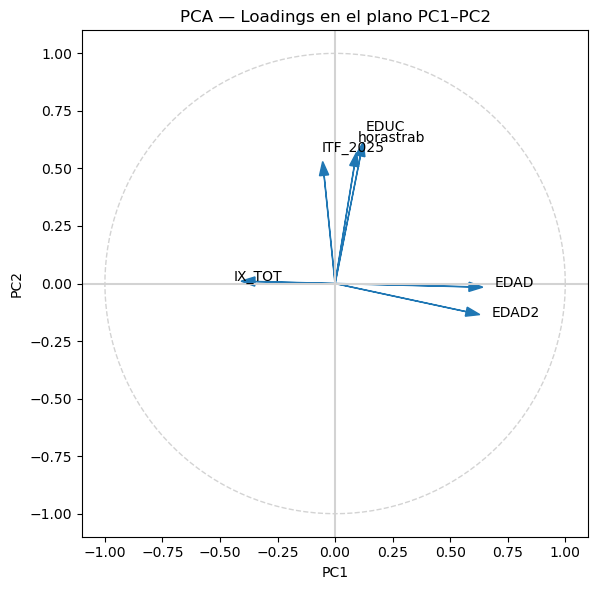

In [65]:
#gráfico de loadings PC1–PC2
plt.figure(figsize=(7,6))

#círculo unidad
theta = np.linspace(0, 2*np.pi, 300)
plt.plot(np.cos(theta), np.sin(theta), color="lightgray", linestyle="--", linewidth=1)

#dibujo una flecha por cada variable
for var in loadings.index:
    x, y = loadings.loc[var, "PC1"], loadings.loc[var, "PC2"] #el peso de cada componente
    plt.arrow(0, 0, x, y, head_width=0.04, length_includes_head=True, color="C0") #dibuja una flecha desde el origen hasta ese punto.
    plt.text(x*1.08, y*1.08, var, fontsize=10) #nombre de la variable al lado de la flecha

plt.axhline(0, color="lightgray"); plt.axvline(0, color="lightgray")
plt.gca().set_aspect('equal', 'box')
plt.title("PCA — Loadings en el plano PC1–PC2")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout()
plt.show()



In [66]:
#EJERCICIO 4

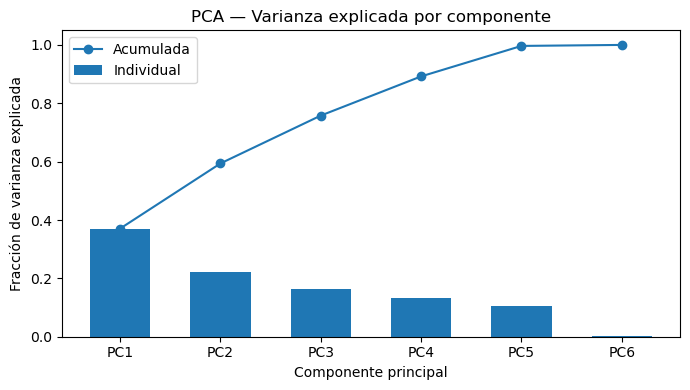

In [67]:
exp_var = pca.explained_variance_ratio_            #varianza explicada por PC
exp_var_cum = np.cumsum(exp_var)                     #acumulada

#acumulada ---> la acumulada es para ver cuanto explican los PC acumulados
plt.figure(figsize=(7,4))
xs = np.arange(1, len(exp_var)+1)

#barras de varianza individual
plt.bar(xs, exp_var, width=0.6)
#línea de varianza acumulada
plt.plot(xs, exp_var_cum, marker="o")

plt.xticks(xs, [f"PC{i}" for i in xs])
plt.ylim(0, 1.05)   # margen visual
plt.xlabel("Componente principal")
plt.ylabel("Fracción de varianza explicada")
plt.title("PCA — Varianza explicada por componente")
plt.legend(["Acumulada","Individual"])
plt.tight_layout()
plt.show()

In [68]:
# B- CLUSTER

In [69]:
#EJERCICIO 5 - A

In [70]:
print(df.columns.tolist())

['ADECCFR', 'ADECIFR', 'ADECINDR', 'ADECOCUR', 'AGLOMERADO', 'ANO4', 'CAT_INAC', 'CAT_OCUP', 'CH03', 'CH04', 'EDAD', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'CODUSU', 'COMPONENTE', 'DECCFR', 'DECIFR', 'DECINDR', 'DECOCUR', 'ESTADO', 'GDECCFR', 'GDECIFR', 'GDECINDR', 'GDECOCUR', 'H15', 'IDECCFR', 'IDECIFR', 'IDECINDR', 'IDECOCUR', 'INTENSI', 'IPCF', 'ITF', 'MAS_500', 'NIVEL_ED', 'NRO_HOGAR', 'P21', 'P47T', 'PDECCFR', 'PDECIFR', 'PDECINDR', 'PDECOCUR', 'PONDERA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'PP04A', 'PP04B1', 'PP04B2', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04B3_MES', 'PP04B_COD', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05B2_MES', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 

In [71]:
# Creo df_clu a partir de la base original df
# CH06 = edad, ITF = ingreso total familiar

df_clu = df[['EDAD', 'ITF', 'POBRE']].copy()

# Creo la variable EDAD al cuadrado
df_clu['EDAD2'] = df_clu['EDAD'] ** 2

# Elimino filas con valores faltantes en las variables clave
df_clu = df_clu.dropna(subset=['EDAD2', 'ITF'])

print("df_clu creado con columnas:", df_clu.columns.tolist())
print("Shape:", df_clu.shape)
df_clu.head()


df_clu creado con columnas: ['EDAD', 'ITF', 'POBRE', 'EDAD2']
Shape: (45651, 4)


,EDAD,ITF,POBRE,EDAD2
0,25,1028000.0,1,625
1,7,1028000.0,1,49
2,4,1028000.0,1,16
4,29,690000.0,1,841
5,13,690000.0,1,169


In [72]:
# --- Prep: asegurar df_norm a partir de df_clu ---
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

if 'df_clu' not in globals():
    raise NameError("Falta df_clu (tu DataFrame original). Cargalo antes.")

# Si no tenés EDAD2, la creo desde EDAD
if 'EDAD2' not in df_clu.columns and 'EDAD' in df_clu.columns:
    df_clu = df_clu.copy()
    df_clu['EDAD2'] = df_clu['EDAD']**2

# Checks básicos
req = ['EDAD2', 'ITF']
faltan = [c for c in req if c not in df_clu.columns]
if faltan:
    raise KeyError(f"Faltan columnas en df_clu: {faltan}. Necesito {req}")

# Limpieza mínima y normalización
df_work = df_clu[req].replace([np.inf, -np.inf], np.nan).dropna()
scaler = StandardScaler()
X = scaler.fit_transform(df_work[['EDAD2', 'ITF']])
df_norm = pd.DataFrame(X, index=df_work.index, columns=['EDAD2_norm','ITF_norm'])
print("df_norm listo:", df_norm.shape, "columnas:", list(df_norm.columns))


df_norm listo: (45651, 2) columnas: ['EDAD2_norm', 'ITF_norm']


Observaciones originales: 45651
Observaciones después de filtrar: 44697


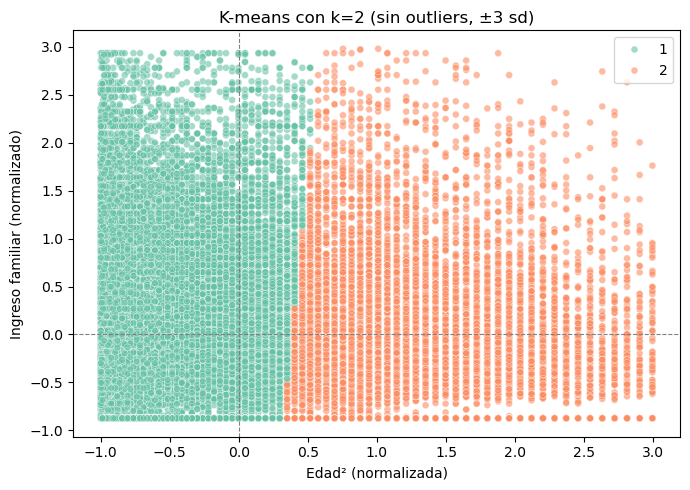

Cluster counts para k=2:
cluster_k2
1    32106
2    12591
Name: count, dtype: int64
--------------------


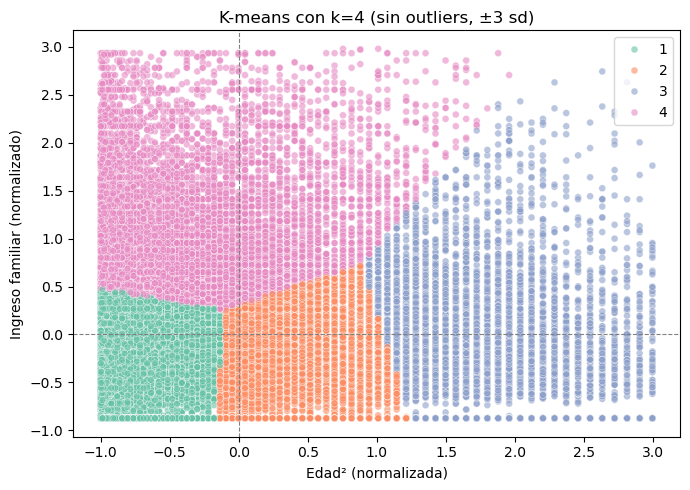

Cluster counts para k=4:
cluster_k4
1    19711
2     9245
3     6633
4     9108
Name: count, dtype: int64
--------------------


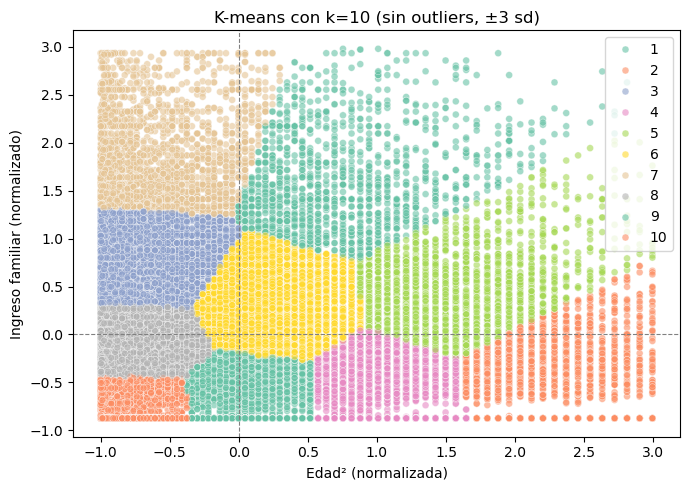

Cluster counts para k=10:
cluster_k10
1     5157
2     2716
3     5027
4     4308
5     2345
6     4540
7     2096
8     8889
9     1520
10    8099
Name: count, dtype: int64
--------------------


In [73]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#filtro outliers en ±3 sd
df_filt = df_norm[
    (df_norm["EDAD2_norm"].between(-3, 3)) &
    (df_norm["ITF_norm"].between(-3, 3))
].copy()

print(f"Observaciones originales: {len(df_norm)}")
print(f"Observaciones después de filtrar: {len(df_filt)}")

#clustering con los datos filtrados
k_values = [2, 4, 10]

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = kmeans.fit_predict(df_filt[["EDAD2_norm", "ITF_norm"]])

    df_filt[f"cluster_k{k}"] = labels + 1   # +1 para numerar 1..k

    # Plotting
    plt.figure(figsize=(7,5))
    sns.scatterplot(
        data=df_filt,
        x="EDAD2_norm",
        y="ITF_norm",
        hue=f"cluster_k{k}",
        palette=sns.color_palette("Set2", n_colors=k),
        alpha=0.6,
        s=25
    )

    plt.title(f"K-means con k={k} (sin outliers, ±3 sd)")
    plt.xlabel("Edad² (normalizada)")
    plt.ylabel("Ingreso familiar (normalizado)")
    plt.axhline(0, color='gray', ls='--', lw=0.8)
    plt.axvline(0, color='gray', ls='--', lw=0.8)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Cluster counts para k={k}:")
    print(df_filt[f"cluster_k{k}"].value_counts().sort_index())
    print("-" * 20)


Observaciones originales: 45651
Observaciones después de filtrar: 32765


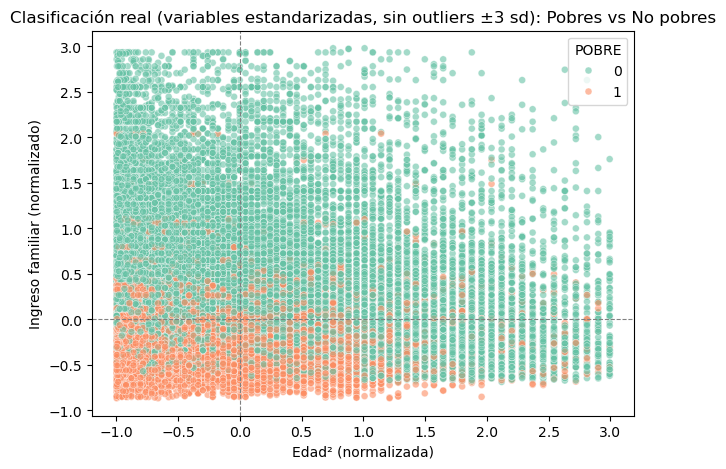

In [74]:
df_plot = df_norm.join(df_clu["POBRE"])

# filtro outliers - adding dropna() to handle missing values
df_plot_filt = df_plot[
    (df_plot["EDAD2_norm"].between(-3, 3, inclusive="both")) &
    (df_plot["ITF_norm"].between(-3, 3, inclusive="both"))
].dropna().copy()  # dropna() removes rows with any NaN values

print(f"Observaciones originales: {len(df_plot)}")
print(f"Observaciones después de filtrar: {len(df_plot_filt)}")

# grafico
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_plot_filt,
    x="EDAD2_norm", y="ITF_norm",
    hue="POBRE", palette="Set2", alpha=0.6, s=25
)
plt.xlabel("Edad² (normalizada)")
plt.ylabel("Ingreso familiar (normalizado)")
plt.axhline(0, color="gray", ls="--", lw=0.8)
plt.axvline(0, color="gray", ls="--", lw=0.8)
plt.title("Clasificación real (variables estandarizadas, sin outliers ±3 sd): Pobres vs No pobres")
plt.show()


#esto es para responder la pregunta de si puede el algoritmo con 𝑘 = 2 separar correctamente a las personas pobres y no pobres en su región

In [75]:
# ejercicio 5 - B

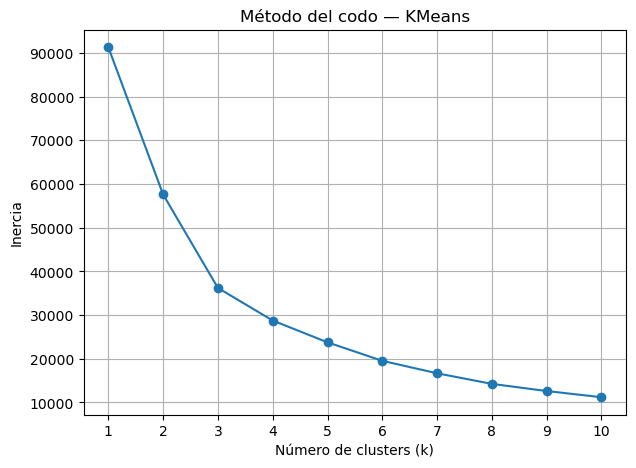

In [76]:
#hago el metodo del codo para ver cuantos clusters tengo que hacer
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(X)  # X es tu matriz estandarizada de EDAD e ITF_2025
    inertias.append(kmeans.inertia_)

#gráfico del método del codo
plt.figure(figsize=(7,5))
plt.plot(K, inertias, marker="o")
plt.xticks(K)
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia") #--> inercia mide qué tan bien se agrupa un conjunto de datos mediante K-Means
plt.title("Método del codo — KMeans")
plt.grid(True)
plt.show()

#segun este grafico hay que hacer 3 clusters

In [ ]:
from sklearn.metrics import silhouette_score
cols = ['EDAD2','ITF']
df_work = (
    df_clu[cols]
    .replace([np.inf, -np.inf], np.nan)
    .dropna(subset=cols)
    .copy()
)

if df_work.empty:
    raise ValueError("No hay datos válidos en EDAD2/ITF tras limpiar NaN/Inf.")

#normalizo
scaler = StandardScaler()
X = scaler.fit_transform(df_work[['EDAD2','ITF']])
df_norm = pd.DataFrame(X, index=df_work.index, columns=['EDAD2_norm','ITF_norm'])

#outliers
df_filt = df_norm[
    df_norm['EDAD2_norm'].between(-3, 3) &
    df_norm['ITF_norm'].between(-3, 3)
].copy()

print(f"Observaciones originales (limpias): {len(df_work)}")
print(f"Observaciones tras normalizar:      {len(df_norm)}")
print(f"Observaciones tras filtrar ±3 sd:   {len(df_filt)}")

if len(df_filt) < 10:
    raise ValueError("Quedaron muy pocas filas tras el filtro ±3 sd. Relajá el filtro y/o revisá la base.")

k = 3
kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
labels = kmeans.fit_predict(df_filt[['EDAD2_norm','ITF_norm']])

df_filt[f'cluster_k{k}'] = labels + 1  # 1..k

# Métrica de calidad
# sil = silhouette_score(df_filt[['EDAD2_norm','ITF_norm']], labels)
# print(f"\nSilhouette score (k={k}): {sil:.3f}")

#grafico
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_filt,
    x='EDAD2_norm',
    y='ITF_norm',
    hue=f'cluster_k{k}',
    palette=sns.color_palette('Set2', n_colors=k),
    alpha=0.7,
    s=30
)
plt.title(f'K-Means con k={k} (sin outliers, ±3 sd)')
plt.xlabel('Edad² (normalizada)')
plt.ylabel('Ingreso familiar (normalizado)')
plt.axhline(0, color='gray', ls='--', lw=0.8)
plt.axvline(0, color='gray', ls='--', lw=0.8)
plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#estandarizar
scaler = StandardScaler()
X_std = scaler.fit_transform(df_clu[["EDAD2", "ITF"]])  # Replace "ITF" with the actual column name
df_norm = pd.DataFrame(X_std, columns=["EDAD2_norm", "ITF_norm"], index=df_clu.index)

#filtro outliers (±3 sd)
df_filt = df_norm[
    df_norm["EDAD2_norm"].between(-3, 3) & df_norm["ITF_norm"].between(-3, 3)
].copy()

#k=3
kmeans = KMeans(n_clusters=3, n_init=20, random_state=42)
labels = kmeans.fit_predict(df_filt[["EDAD2_norm", "ITF_norm"]])
df_filt["cluster_k3"] = labels + 1  # numerar 1..3

#gráfico
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_filt,
    x="EDAD2_norm", y="ITF_norm",
    hue="cluster_k3", palette="Set2", alpha=0.6, s=25
)
plt.axhline(0, color='gray', ls='--', lw=0.8)
plt.axvline(0, color='gray', ls='--', lw=0.8)
plt.xlabel("Edad2 estandarizada")
plt.ylabel("Ingreso familiar estandarizado")
plt.title("K-means con k=3 sin outliers)")
plt.show()

In [ ]:
# ejercicio 6

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#no me acuerdo si ya estan importadas estas libreria

#uso las 6 variables porque dice el punto
vars_inc2 = ["EDAD","EDAD2","EDUC","ITF_2025","IX_TOT","horastrab"]
df_hclu = base_part2.dropna(subset=vars_inc2).copy()

#estandarizo para que todas las variables tienen el mismo “peso” en el cálculo de distancias
scaler = StandardScaler()
X_h = scaler.fit_transform(df_hclu[vars_inc2])

#matriz de linkage (Ward = criterio que minimiza varianza intra-grupo)
linkage_matrix = sch.linkage(X_h, method="ward")

#dendrograma
plt.figure(figsize=(12,6))
dendro = sch.dendrogram(linkage_matrix, no_labels=True, color_threshold=0)

plt.title("Cluster jerárquico (Ward) — Dendrograma")
plt.xlabel("Individuos")
plt.ylabel("Distancia (disimilitud)")
plt.show()


In [ ]:
#Ejercicio 7